In [1]:
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
from bellem.dvc.experiment import load_experiments

experiments = load_experiments('qa-prompt-optim-experiments.json')
print(f"{len(experiments)} experiments")
experiments[0]

21 experiments


{'commit': 'workspace',
 'id': 'workspace',
 'name': None,
 'params': {'train': {'dataset': {'path': 'bdsaglam/musique-mini',
    'name': 'answerable',
    'split': 'train'},
   'optimizer': 'noop'},
  'qa': {'model': 'llama-3-70b-tgi',
   'temperature': 0.1,
   'technique': 'standard'},
  'evaluation': {'dataset': {'path': 'bdsaglam/musique-mini',
    'name': 'answerable',
    'split': 'validation'}},
  'run': 1},
 'metrics': {'exact_match': 0.55,
  'f1': 0.6629834609834611,
  'fuzzy_match': 0.61,
  '2hops': {'exact_match': 0.6, 'f1': 0.7348075258075258, 'fuzzy_match': 0.68},
  '3hops': {'exact_match': 0.59,
   'f1': 0.6825476190476191,
   'fuzzy_match': 0.64},
  '4hops': {'exact_match': 0.46,
   'f1': 0.5715952380952382,
   'fuzzy_match': 0.51}}}

In [5]:
df = pd.json_normalize(experiments).drop(columns=["commit", "id"])

param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
# df.drop_duplicates(subset=param_cols, inplace=True)

df = df[~df['name'].isin([None])].copy()
df = df[df['params.evaluation.dataset.path']=='bdsaglam/musique'].copy()
df.reset_index(drop=True, inplace=True)
df

,name,params.train.dataset.path,params.train.dataset.name,params.train.dataset.split,params.train.optimizer,params.qa.model,params.qa.temperature,params.qa.technique,params.evaluation.dataset.path,params.evaluation.dataset.name,...,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match,metrics.3hops.exact_match,metrics.3hops.f1,metrics.3hops.fuzzy_match,metrics.4hops.exact_match,metrics.4hops.f1,metrics.4hops.fuzzy_match
0,minor-knit,bdsaglam/musique-mini,answerable,train,bfsrs-medium,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.658668,0.634984,0.743337,0.700479,0.588158,0.718092,0.646053,0.508642,0.592465,0.553086
1,peppy-pans,bdsaglam/musique-mini,answerable,train,miprov2-light,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.652875,0.629393,0.740232,0.694089,0.584211,0.713838,0.642105,0.498765,0.585916,0.545679
2,hated-alga,bdsaglam/musique-mini,answerable,train,noop,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.653289,0.630990,0.739310,0.696486,0.581579,0.710720,0.642105,0.508642,0.595381,0.540741
3,burry-daws,bdsaglam/musique-mini,answerable,train,bfs-medium,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.683492,0.646166,0.766203,0.715655,0.617105,0.743502,0.693421,0.525926,0.616820,0.565432
4,chirk-zoea,bdsaglam/musique-mini,answerable,train,noop,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.654944,0.631789,0.741108,0.699681,0.580263,0.706429,0.640789,0.508642,0.595082,0.543210
5,axile-yogi,bdsaglam/musique-mini,answerable,train,bfsrs-medium,llama-3-70b-tgi,0.1,cot,bdsaglam/musique,answerable,...,0.688871,0.638179,0.764870,0.714856,0.614474,0.742040,0.696053,0.555556,0.641240,0.595062
6,bifid-many,bdsaglam/musique-mini,answerable,train,bfsrs-medium,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.654530,0.630990,0.741251,0.697284,0.588158,0.710102,0.647368,0.491358,0.585728,0.535802
7,tidal-kyat,bdsaglam/musique-mini,answerable,train,bfsrs-medium,llama-3-70b-tgi,0.1,standard,bdsaglam/musique,answerable,...,0.695490,0.658147,0.772644,0.733227,0.643421,0.749181,0.700000,0.533333,0.634908,0.570370
8,malar-shoe,bdsaglam/musique-mini,answerable,train,miprov2-light,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.654530,0.630990,0.741251,0.697284,0.588158,0.710102,0.647368,0.491358,0.585728,0.535802
9,weird-mela,bdsaglam/musique-mini,answerable,train,bfs-medium,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.684319,0.647764,0.767573,0.718051,0.619737,0.745722,0.693421,0.523457,0.616502,0.562963


In [6]:
target_params = ["params.qa.technique", "params.train.optimizer", "params.qa.temperature"]

In [7]:
run_counts = df.groupby(target_params)[metric_cols[:1]].count().reset_index()
mask = run_counts[metric_cols[0]] < 3
run_counts.loc[mask]

,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match
0,cot,bfs-medium,0.1,1
1,cot,bfsrs-medium,0.1,1
2,cot,miprov2-light,0.1,1
3,cot,noop,0.1,1
4,cte,bfs-medium,0.1,2
5,cte,bfsrs-medium,0.1,2
6,cte,miprov2-light,0.1,2
7,cte,noop,0.1,2
8,standard,bfs-medium,0.1,1
9,standard,bfsrs-medium,0.1,1


In [9]:
# Average metrics over repeated runs (params.run)
df_avg = df.groupby(target_params)[metric_cols].max().reset_index()
df_avg[[*target_params, *metric_cols]].sort_values("metrics.f1")

,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match,metrics.3hops.exact_match,metrics.3hops.f1,metrics.3hops.fuzzy_match,metrics.4hops.exact_match,metrics.4hops.f1,metrics.4hops.fuzzy_match
11,standard,noop,0.1,0.560612,0.682180,0.618949,0.603035,0.719479,0.671725,0.565789,0.696164,0.611842,0.419753,0.540638,0.469136
6,cte,miprov2-light,0.1,0.594125,0.706075,0.654530,0.630990,0.741251,0.697284,0.588158,0.713838,0.647368,0.498765,0.585916,0.545679
7,cte,noop,0.1,0.594952,0.706203,0.654944,0.631789,0.741108,0.699681,0.581579,0.710720,0.642105,0.508642,0.595381,0.543210
3,cot,noop,0.1,0.600331,0.706207,0.653289,0.623003,0.732298,0.690895,0.611842,0.721260,0.659211,0.508642,0.597301,0.525926
5,cte,bfsrs-medium,0.1,0.599090,0.710118,0.658668,0.634984,0.743337,0.700479,0.588158,0.718092,0.647368,0.508642,0.592465,0.553086
8,standard,bfs-medium,0.1,0.612743,0.732437,0.686802,0.643770,0.766231,0.725240,0.615789,0.740412,0.693421,0.511111,0.613001,0.555556
2,cot,miprov2-light,0.1,0.608192,0.733053,0.692180,0.628594,0.758908,0.704473,0.606579,0.736642,0.722368,0.548148,0.646394,0.597531
10,standard,miprov2-light,0.1,0.612743,0.733104,0.684319,0.646965,0.768720,0.723642,0.607895,0.737875,0.686842,0.516049,0.614051,0.558025
0,cot,bfs-medium,0.1,0.611916,0.734010,0.683906,0.644569,0.767786,0.717252,0.607895,0.742034,0.693421,0.518519,0.614540,0.562963
4,cte,bfs-medium,0.1,0.618122,0.735388,0.684319,0.647764,0.767573,0.718051,0.619737,0.745722,0.693421,0.525926,0.616820,0.565432


In [10]:
df_target = df_avg.copy()
df_target.sort_values('metrics.f1', inplace=True)

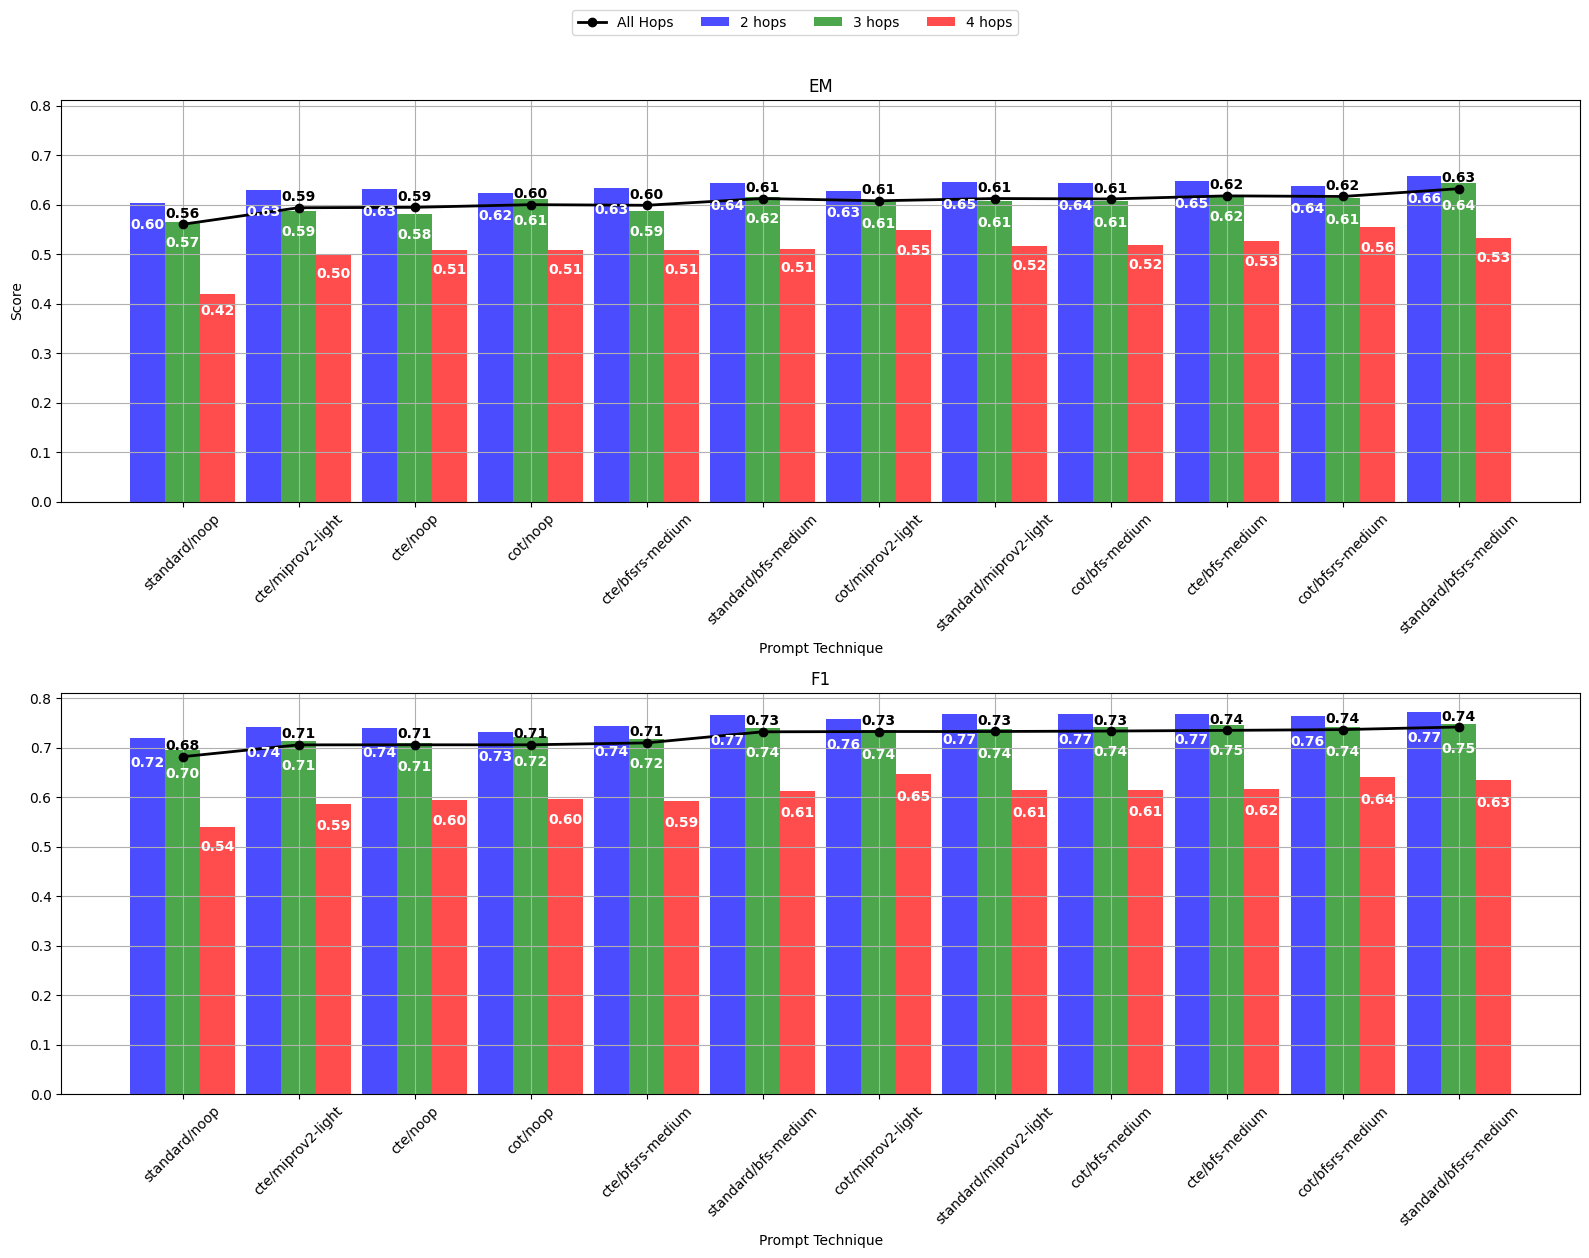

In [12]:
def plot_metric(ax, x, width, prompts, metrics, title, ylabel=None):
    bars_2hops = ax.bar(x - width, metrics["2hops"], width, label="2 hops", color="b", alpha=0.7)
    bars_3hops = ax.bar(x, metrics["3hops"], width, label="3 hops", color="g", alpha=0.7)
    bars_4hops = ax.bar(x + width, metrics["4hops"], width, label="4 hops", color="r", alpha=0.7)

    # Plotting all hops as a line plot
    ax.plot(x, metrics["all"], label="All Hops", color="k", linestyle="-", marker="o", linewidth=2)

    # Adding values inside the bars, just below the top
    for bars in [bars_2hops, bars_3hops, bars_4hops]:
        for bar in bars:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() - (bar.get_height() * 0.05),
                f"{bar.get_height():.2f}",
                ha="center",
                va="top",
                fontsize=10,
                color="white",
                fontweight="bold",
            )

    # Adding values on top of the line plot
    for i, value in enumerate(metrics["all"]):
        ax.text(
            x[i],
            value + 0.007,
            f"{value:.2f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

    # Adjust titles and labels
    ax.set_title(title)
    ax.set_xlabel("Prompt Technique")
    ax.set_xticks(x)
    ax.set_xticklabels([prompt.replace(".txt", "") for prompt in prompts], rotation=45)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.grid(True)


# Creating subplots for Exact Match and F1, separating them for clarity
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharey=True)

width = 0.3  # Bar width adjustment

prompts = [
    f"{pt}/{optim}"
    for pt, optim in zip(df_target["params.qa.technique"].values, df_target["params.train.optimizer"].values)
]
x = np.arange(len(prompts))


# Plotting Exact Match
metrics_em = {
    "2hops": df_target["metrics.2hops.exact_match"].values,
    "3hops": df_target["metrics.3hops.exact_match"].values,
    "4hops": df_target["metrics.4hops.exact_match"].values,
    "all": df_target["metrics.exact_match"].values,
}
plot_metric(ax1, x, width, prompts, metrics_em, title="EM", ylabel="Score")

# Plotting F1
metrics_f1 = {
    "2hops": df_target["metrics.2hops.f1"].values,
    "3hops": df_target["metrics.3hops.f1"].values,
    "4hops": df_target["metrics.4hops.f1"].values,
    "all": df_target["metrics.f1"].values,
}
plot_metric(ax2, x, width, prompts, metrics_f1, title="F1")

# Creating a shared legend outside the plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=4)

plt.tight_layout()
plt.show()